# 1. Importing Libraries

In [109]:

pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# 2. Reading Data

In [112]:
df = pd.read_csv('D:\Indian_housing_Delhi_data.csv')
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


In [113]:
df.shape

(5000, 16)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   object 
 1   house_size        5000 non-null   object 
 2   location          5000 non-null   object 
 3   city              5000 non-null   object 
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   object 
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   object 
 13  description       4715 non-null   object 
 14  SecurityDeposit   5000 non-null   object 
 15  Status            5000 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

# 3. Data Analysis

In [116]:
# Analysing Missing Values

feature_nan = [feature for feature in df.columns if df[feature].isnull().sum() >1]

for feature in feature_nan:
    print(f'The percentage of NaN values in {feature} is: {np.round(df[feature].isnull().mean(),3)} %')

The percentage of NaN values in numBathrooms is: 0.005 %
The percentage of NaN values in numBalconies is: 0.453 %
The percentage of NaN values in isNegotiable is: 0.964 %
The percentage of NaN values in priceSqFt is: 1.0 %
The percentage of NaN values in description is: 0.057 %


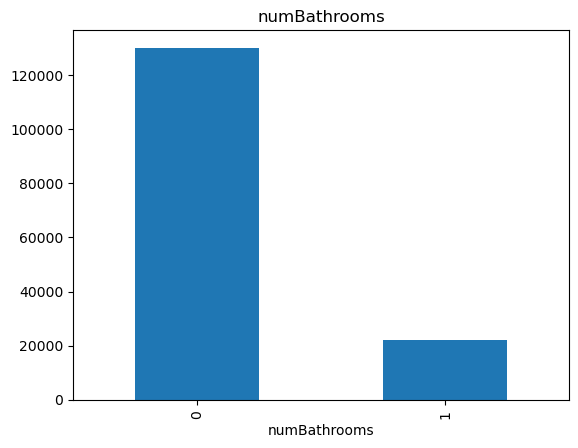

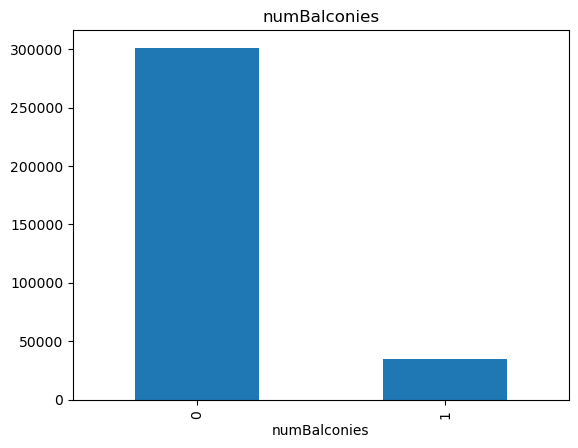

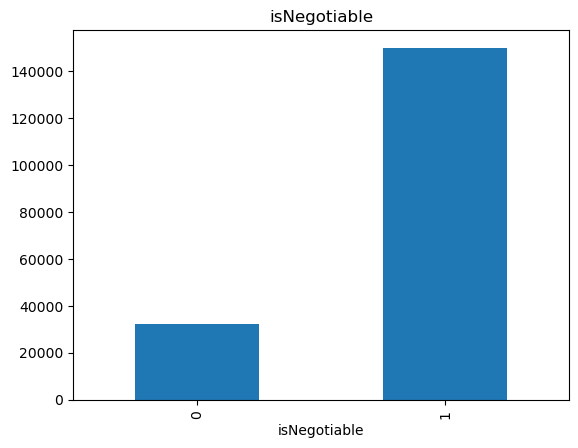

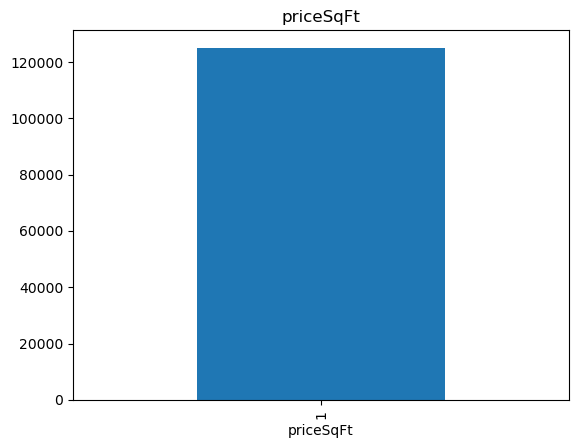

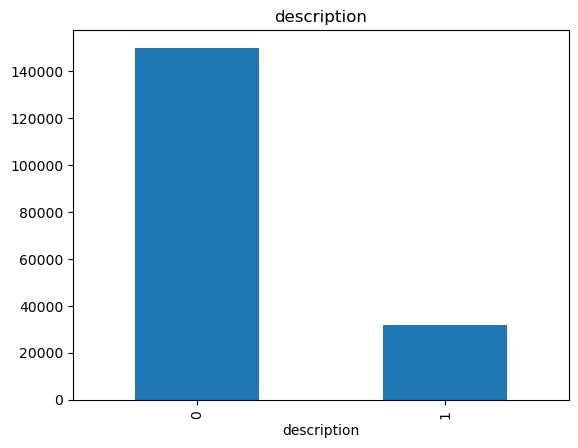

In [117]:
# Analysing Impact of NaN on Rent

for feature in feature_nan:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)

    data.groupby(feature)['price'].median().plot(kind='bar')
    plt.title(feature)
    plt.show()

**Most of the features containing NaN have significant difference in rent price for both 0 and 1 categories and therefore should be handled instead of dropping. Except for priceSqFt that contains only NaN and can be dropped.**

In [119]:
## Indetifying categorical and numerical features

num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [120]:
df[num_feature].head()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt
0,28.545561,77.254349,22000,1.0,NaN,NaN
1,28.643259,77.132828,20000,1.0,NaN,NaN
2,28.618677,77.053352,8500,1.0,NaN,NaN
3,28.712898,77.180000,48000,3.0,NaN,NaN
4,28.723539,77.131424,20000,2.0,NaN,NaN


In [121]:
df[cat_feature].head()

,house_type,house_size,location,city,currency,isNegotiable,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,INR,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,INR,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,INR,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,INR,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,INR,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


In [122]:
## Identifying and analysing numerical features that are dicrete or continuous.

discrete = [feature for feature in num_feature if df[feature].nunique() < 25 and feature != 'priceSqFt']
continuous = [feature for feature in num_feature if feature not in discrete and feature != 'priceSqFt' ]
print(f'Number of discrete columns: {len(discrete)}')
print(f'Number of continuous columns: {len(continuous)}')



Number of discrete columns: 2
Number of continuous columns: 3


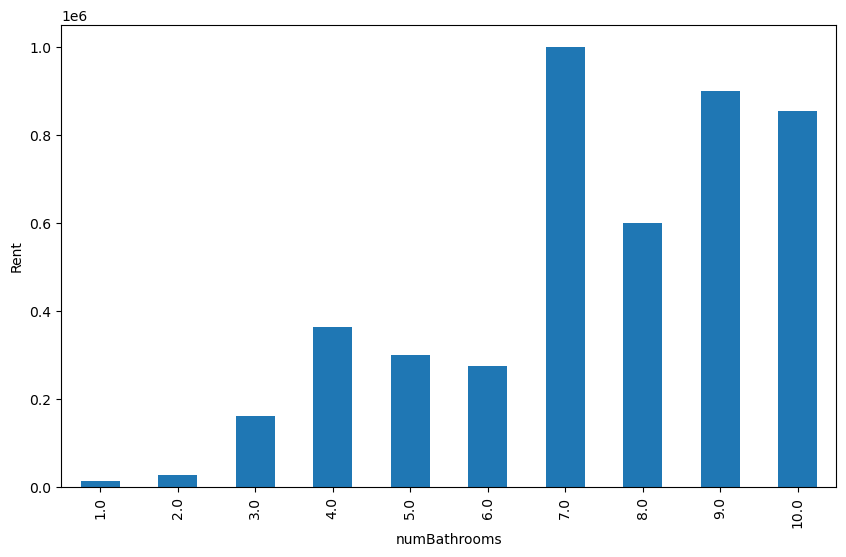

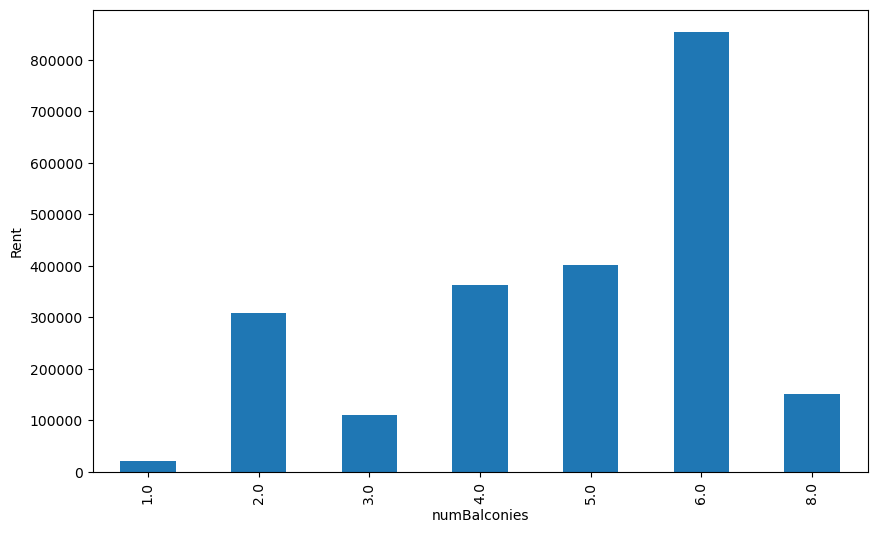

In [123]:
for feature in discrete:
    df.groupby(feature)['price'].median().plot(kind='bar',figsize=(10,6))
    plt.xlabel(feature)
    plt.ylabel('Rent')
    plt.show()

In [124]:
df[(df['numBalconies'] == 8.0) | (df['numBalconies'] == 6.0)]

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
2695,5 BHK Villa,"6,521 sq ft",Gulmohar park,Delhi,28.557659,77.212486,401012,INR,4.0,6.0,NaN,NaN,Posted a year ago,Itâs a 5 bhk villa situated in Gulmohar park...,"10,10,202",Unfurnished
3961,9 BHK Independent House,"9,841 sq ft",Shanti Niketan,Delhi,28.577921,77.169373,1010102,INR,9.0,6.0,NaN,NaN,Posted 3 years ago,NaN,"30,10,111",Unfurnished
3964,10 BHK Independent House,"11,221 sq ft",Greater Kailash II,Delhi,28.531740,77.249138,854612,INR,10.0,6.0,NaN,NaN,Posted 3 years ago,NaN,"25,44,612",Unfurnished
4154,6 BHK penthouse,"3,500 sq ft",Sheikh Sarai Village,Delhi,28.534254,77.221458,150000,INR,6.0,8.0,Negotiable,NaN,Posted a month ago,This is a 6 BHK and 6 baths penthouse property...,"3,00,000",Furnished


1. Plot 1 follows a general upward trend where rent tends to increase with in increase number of bathrooms, where properties with 7 bathrooms have highest rent.

2. Plot 2 shows a general upward trend where rent increases with the number of balconies, with properties having 6 balconies commanding the highest rent. However, it's important to note that rent drops significantly for property with 8 balconies. This decline could be due to the fact that the number of balconies exceeds the number of rooms, and the house size for 6 BHK units is relatively small, making the property feel cramped and less appealing.

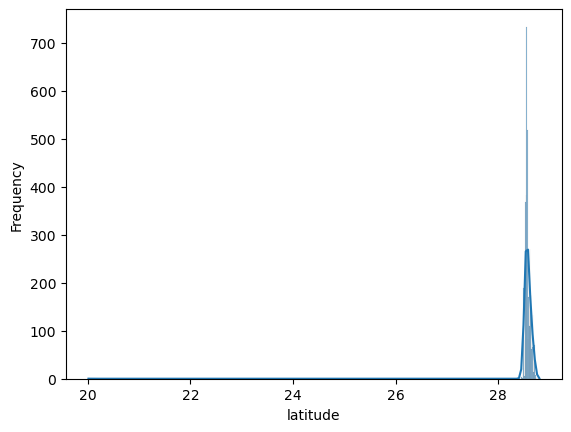

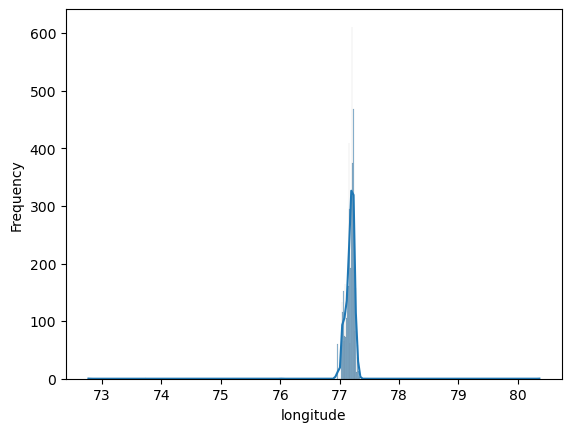

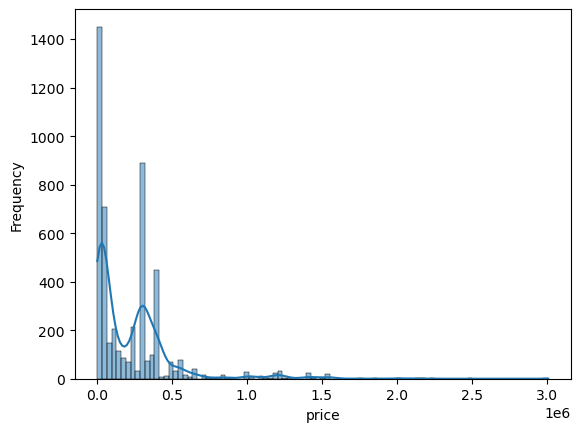

In [126]:
for feature in continuous:
    sns.histplot(data = df,x = feature,kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [127]:
df[['latitude','longitude','price']].corr()

,latitude,longitude,price
latitude,1.000000,0.498180,-0.045589
longitude,0.498180,1.000000,0.133261
price,-0.045589,0.133261,1.000000


The distribution for all continuous features looks skewed but since longitude and latitude don't have much impact on price, they can dropped. However rent is heavily right skewed and need to be normalized.

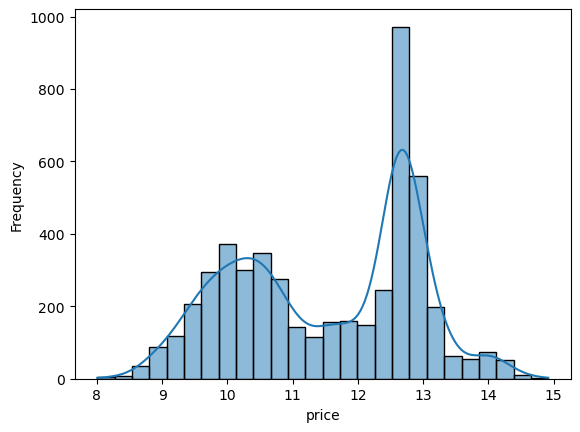

In [129]:
data = df.copy()
data['price'] = np.log(data['price'])
sns.histplot(data = data,x = 'price',kde=True)
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

Log transformation helps remove skewness in rent price. The plot looks more centered with 2 peaks.

In [131]:
## Analysing Cateorical Features

for feature in cat_feature:
    print(f'Cardinality of {feature} is: {df[feature].nunique()}')

Cardinality of house_type is: 28
Cardinality of house_size is: 339
Cardinality of location is: 288
Cardinality of city is: 1
Cardinality of currency is: 1
Cardinality of isNegotiable is: 1
Cardinality of verificationDate is: 52
Cardinality of description is: 3820
Cardinality of SecurityDeposit is: 646
Cardinality of Status is: 3


1. City and currency have only one type of value and since entire data as same value for both, they don't have impact on rent.
2. It is very obvious that properties that are negotiable will have less rent.
3. Only status as well defined categories with cardinalty 3. Rest of the features have high cardinality.

In [133]:
## Outlier Detection

Q1,Q3= df['price'].quantile([0.25,0.75])

IQR = Q3-Q1

ub = Q3 + (1.5 * IQR)
lb = Q1 - (1.5 * IQR)

df[(df['price'] < lb) | (df['price'] > ub )]

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
42,8 BHK Independent Floor,"7,200 sq ft",DLF Farms,Delhi,28.488153,77.156975,1400000,INR,8.0,NaN,NaN,NaN,Posted 3 years ago,Itâs a 8 bhk builder floor situated in DLF F...,No Deposit,Semi-Furnished
558,8 BHK Independent Floor,"7,200 sq ft",DLF Farms,Delhi,28.488153,77.156975,1400000,INR,8.0,NaN,NaN,NaN,Posted 3 years ago,Well designed 8 bhk builder floor is available...,No Deposit,Semi-Furnished
695,4 BHK Independent House,"7,000 sq ft",Central Ridge Reserve Forest,Delhi,28.606810,77.183601,2000000,INR,4.0,NaN,NaN,NaN,Posted 2 months ago,Itâs a 4 bhk independent house situated in C...,No Deposit,Semi-Furnished
940,7 BHK Independent Floor,"9,000 sq ft",Greater Kailash,Delhi,28.550154,77.241455,1000000,INR,7.0,NaN,NaN,NaN,Posted 16 days ago,A 7 bhk property is available for rental in Gr...,No Deposit,Semi-Furnished
973,10 BHK Independent House,"5,200 sq ft",Hauz Khas,Delhi,28.550165,77.196457,900000,INR,9.0,NaN,NaN,NaN,Posted 16 days ago,A spacious 10 bhk independent house is availab...,No Deposit,Semi-Furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1401100,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its four bhk villa in the super location of De...,"45,20,105",Unfurnished
4993,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1202012,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its four bhk villa in the super location of De...,"40,11,010",Unfurnished
4994,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1022001,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its four bhk villa in the super location of De...,"40,10,102",Unfurnished
4995,4 BHK Villa,"5,896 sq ft",Sunder Nagar,Delhi,28.618437,76.961784,1022001,INR,4.0,2.0,NaN,NaN,Posted 2 months ago,Its four bhk villa in the super location of De...,"40,10,102",Unfurnished


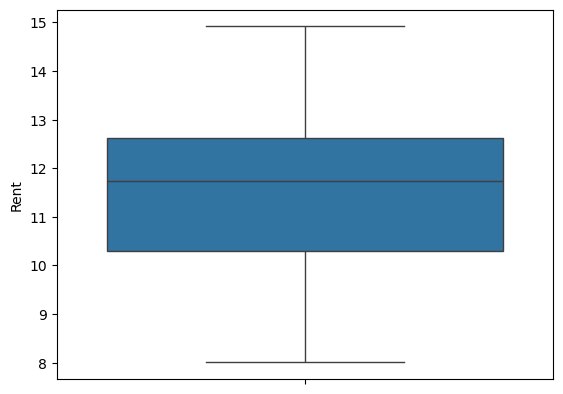

In [134]:
data = df.copy()
data['price'] = np.log(data['price'])
sns.boxplot(data = data,y = 'price')
plt.ylabel('Rent')
plt.show()

Looks like there are no outliers post log transformation as the rent gets normalised.

# 4. Feature Engineering

In [137]:
#removing unwanted columns

df2 = df.copy()
df2.drop(['priceSqFt','description','city','currency'], axis=1,inplace=True)
df2.head()

,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,28.545561,77.254349,22000,1.0,NaN,NaN,Posted a day ago,No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,28.643259,77.132828,20000,1.0,NaN,NaN,Posted 9 days ago,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,28.618677,77.053352,8500,1.0,NaN,NaN,Posted 12 days ago,No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,28.712898,77.180000,48000,3.0,NaN,NaN,Posted a year ago,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,28.723539,77.131424,20000,2.0,NaN,NaN,Posted a year ago,No Deposit,Unfurnished


In [138]:
## Handling missing values for categorical features
cat_nan = [feature for feature in df2.columns if df2[feature].isnull().sum() >1 and df2[feature].dtype == 'O']

for feature in cat_nan:
    df2[feature+'_'+'nan']=np.where(df2[feature].isnull(),1,0)
    df2[feature].fillna('Missing',inplace=True)

df2.head()

,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan
0,1 RK Studio Apartment,400 sq ft,Kalkaji,28.545561,77.254349,22000,1.0,NaN,Missing,Posted a day ago,No Deposit,Furnished,1
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,28.643259,77.132828,20000,1.0,NaN,Missing,Posted 9 days ago,No Deposit,Furnished,1
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,28.618677,77.053352,8500,1.0,NaN,Missing,Posted 12 days ago,No Deposit,Semi-Furnished,1
3,3 BHK Independent House,"1,020 sq ft",Model Town,28.712898,77.180000,48000,3.0,NaN,Missing,Posted a year ago,No Deposit,Furnished,1
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,28.723539,77.131424,20000,2.0,NaN,Missing,Posted a year ago,No Deposit,Unfurnished,1


In [139]:
## Handling missing values for numerical features

num_nan=[feature for feature in df2.columns if df2[feature].isnull().sum()>1 and df[feature].dtypes!='O']

for feature in num_nan:
    df2[feature+'_'+'nan']=np.where(df2[feature].isnull(),1,0)
    df2[feature].fillna(df2[feature].median(),inplace = True)

df2.head()

,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan
0,1 RK Studio Apartment,400 sq ft,Kalkaji,28.545561,77.254349,22000,1.0,2.0,Missing,Posted a day ago,No Deposit,Furnished,1,0,1
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,28.643259,77.132828,20000,1.0,2.0,Missing,Posted 9 days ago,No Deposit,Furnished,1,0,1
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,28.618677,77.053352,8500,1.0,2.0,Missing,Posted 12 days ago,No Deposit,Semi-Furnished,1,0,1
3,3 BHK Independent House,"1,020 sq ft",Model Town,28.712898,77.180000,48000,3.0,2.0,Missing,Posted a year ago,No Deposit,Furnished,1,0,1
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,28.723539,77.131424,20000,2.0,2.0,Missing,Posted a year ago,No Deposit,Unfurnished,1,0,1


In [140]:
df2.isnull().sum()

house_type          0
house_size          0
location            0
latitude            0
longitude           0
price               0
numBathrooms        0
numBalconies        0
isNegotiable        0
verificationDate    0
SecurityDeposit     0
Status              0
isNegotiable_nan    0
numBathrooms_nan    0
numBalconies_nan    0
dtype: int64

In [141]:
df2['bhk'] = df2['house_type'].apply(lambda x: int(x.split()[0]))

df2.head()


,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan,bhk
0,1 RK Studio Apartment,400 sq ft,Kalkaji,28.545561,77.254349,22000,1.0,2.0,Missing,Posted a day ago,No Deposit,Furnished,1,0,1,1
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,28.643259,77.132828,20000,1.0,2.0,Missing,Posted 9 days ago,No Deposit,Furnished,1,0,1,1
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,28.618677,77.053352,8500,1.0,2.0,Missing,Posted 12 days ago,No Deposit,Semi-Furnished,1,0,1,2
3,3 BHK Independent House,"1,020 sq ft",Model Town,28.712898,77.180000,48000,3.0,2.0,Missing,Posted a year ago,No Deposit,Furnished,1,0,1,3
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,28.723539,77.131424,20000,2.0,2.0,Missing,Posted a year ago,No Deposit,Unfurnished,1,0,1,2


In [142]:
df2['house_type'] = df2['house_type'].apply(lambda x: x.split()[-1])
df2.head()

,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan,bhk
0,Apartment,400 sq ft,Kalkaji,28.545561,77.254349,22000,1.0,2.0,Missing,Posted a day ago,No Deposit,Furnished,1,0,1,1
1,Apartment,400 sq ft,Mansarover Garden,28.643259,77.132828,20000,1.0,2.0,Missing,Posted 9 days ago,No Deposit,Furnished,1,0,1,1
2,Floor,500 sq ft,Uttam Nagar,28.618677,77.053352,8500,1.0,2.0,Missing,Posted 12 days ago,No Deposit,Semi-Furnished,1,0,1,2
3,House,"1,020 sq ft",Model Town,28.712898,77.180000,48000,3.0,2.0,Missing,Posted a year ago,No Deposit,Furnished,1,0,1,3
4,Apartment,810 sq ft,Sector 13 Rohini,28.723539,77.131424,20000,2.0,2.0,Missing,Posted a year ago,No Deposit,Unfurnished,1,0,1,2


In [143]:
df2['house_size_sqft'] = df2['house_size'].apply(lambda x: int(x.replace(',','').split()[0]))

df2.head()

,house_type,house_size,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan,bhk,house_size_sqft
0,Apartment,400 sq ft,Kalkaji,28.545561,77.254349,22000,1.0,2.0,Missing,Posted a day ago,No Deposit,Furnished,1,0,1,1,400
1,Apartment,400 sq ft,Mansarover Garden,28.643259,77.132828,20000,1.0,2.0,Missing,Posted 9 days ago,No Deposit,Furnished,1,0,1,1,400
2,Floor,500 sq ft,Uttam Nagar,28.618677,77.053352,8500,1.0,2.0,Missing,Posted 12 days ago,No Deposit,Semi-Furnished,1,0,1,2,500
3,House,"1,020 sq ft",Model Town,28.712898,77.180000,48000,3.0,2.0,Missing,Posted a year ago,No Deposit,Furnished,1,0,1,3,1020
4,Apartment,810 sq ft,Sector 13 Rohini,28.723539,77.131424,20000,2.0,2.0,Missing,Posted a year ago,No Deposit,Unfurnished,1,0,1,2,810


In [144]:
df2.drop('house_size',axis=1,inplace=True)

In [145]:
df2.head()

,house_type,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan,bhk,house_size_sqft
0,Apartment,Kalkaji,28.545561,77.254349,22000,1.0,2.0,Missing,Posted a day ago,No Deposit,Furnished,1,0,1,1,400
1,Apartment,Mansarover Garden,28.643259,77.132828,20000,1.0,2.0,Missing,Posted 9 days ago,No Deposit,Furnished,1,0,1,1,400
2,Floor,Uttam Nagar,28.618677,77.053352,8500,1.0,2.0,Missing,Posted 12 days ago,No Deposit,Semi-Furnished,1,0,1,2,500
3,House,Model Town,28.712898,77.180000,48000,3.0,2.0,Missing,Posted a year ago,No Deposit,Furnished,1,0,1,3,1020
4,Apartment,Sector 13 Rohini,28.723539,77.131424,20000,2.0,2.0,Missing,Posted a year ago,No Deposit,Unfurnished,1,0,1,2,810


In [146]:
cat_feature = [feature for feature in df2.columns if df2[feature].dtype == 'O']

for feature in cat_feature:
    label_ordered = df2.groupby(feature)['price'].mean().sort_values().index
    label_ordered = {k:i for i,k in enumerate(label_ordered, 0)}
    df2[feature] = df2[feature].map(label_ordered)

df2.head()

,house_type,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan,bhk,house_size_sqft
0,0,201,28.545561,77.254349,22000,1.0,2.0,1,20,103,0,1,0,1,1,400
1,0,196,28.643259,77.132828,20000,1.0,2.0,1,36,103,0,1,0,1,1,400
2,2,49,28.618677,77.053352,8500,1.0,2.0,1,13,103,1,1,0,1,2,500
3,3,99,28.712898,77.180000,48000,3.0,2.0,1,48,103,0,1,0,1,3,1020
4,0,108,28.723539,77.131424,20000,2.0,2.0,1,48,103,2,1,0,1,2,810


In [147]:
#Normalizing Rent

df2['price'] = np.log(df2['price'])
df2.head()

,house_type,location,latitude,longitude,price,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan,bhk,house_size_sqft
0,0,201,28.545561,77.254349,9.998798,1.0,2.0,1,20,103,0,1,0,1,1,400
1,0,196,28.643259,77.132828,9.903488,1.0,2.0,1,36,103,0,1,0,1,1,400
2,2,49,28.618677,77.053352,9.047821,1.0,2.0,1,13,103,1,1,0,1,2,500
3,3,99,28.712898,77.180000,10.778956,3.0,2.0,1,48,103,0,1,0,1,3,1020
4,0,108,28.723539,77.131424,9.903488,2.0,2.0,1,48,103,2,1,0,1,2,810


In [148]:
#Scaling the features

feature_scale = [feature for feature in df2.columns if feature != 'price']

scaler = StandardScaler()
scaler.fit(df2[feature_scale])

df_scaled = pd.concat([df2['price'].reset_index(drop=True),pd.DataFrame(scaler.transform(df2[feature_scale]), columns = feature_scale)],axis=1)
df_scaled.head()

,price,house_type,location,latitude,longitude,numBathrooms,numBalconies,isNegotiable,verificationDate,SecurityDeposit,Status,isNegotiable_nan,numBathrooms_nan,numBalconies_nan,bhk,house_size_sqft
0,9.998798,-1.694703,-0.066522,-0.170645,0.690597,-1.768653,0.061663,0.192689,-2.274060,-0.680744,-1.845657,0.192689,-0.070888,1.099753,-1.820451,-1.191122
1,9.903488,-1.694703,-0.139295,0.343105,-0.360396,-1.768653,0.061663,0.192689,-0.672398,-0.680744,-1.845657,0.192689,-0.070888,1.099753,-1.820451,-1.191122
2,9.047821,0.146765,-2.278796,0.213840,-1.047752,-1.768653,0.061663,0.192689,-2.974788,-0.680744,-0.448702,0.192689,-0.070888,1.099753,-0.955053,-1.145007
3,10.778956,1.067499,-1.551074,0.709306,0.047583,0.074654,0.061663,0.192689,0.528849,-0.680744,-1.845657,0.192689,-0.070888,1.099753,-0.089655,-0.905204
4,9.903488,-1.694703,-1.420084,0.765263,-0.372537,-0.847000,0.061663,0.192689,0.528849,-0.680744,0.948253,0.192689,-0.070888,1.099753,-0.955053,-1.002047


In [215]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             5000 non-null   float64
 1   house_type        5000 non-null   float64
 2   location          5000 non-null   float64
 3   latitude          5000 non-null   float64
 4   longitude         5000 non-null   float64
 5   numBathrooms      5000 non-null   float64
 6   numBalconies      5000 non-null   float64
 7   isNegotiable      5000 non-null   float64
 8   verificationDate  5000 non-null   float64
 9   SecurityDeposit   5000 non-null   float64
 10  Status            5000 non-null   float64
 11  isNegotiable_nan  5000 non-null   float64
 12  numBathrooms_nan  5000 non-null   float64
 13  numBalconies_nan  5000 non-null   float64
 14  bhk               5000 non-null   float64
 15  house_size_sqft   5000 non-null   float64
dtypes: float64(16)
memory usage: 625.1 KB


# 5. Feature Selection

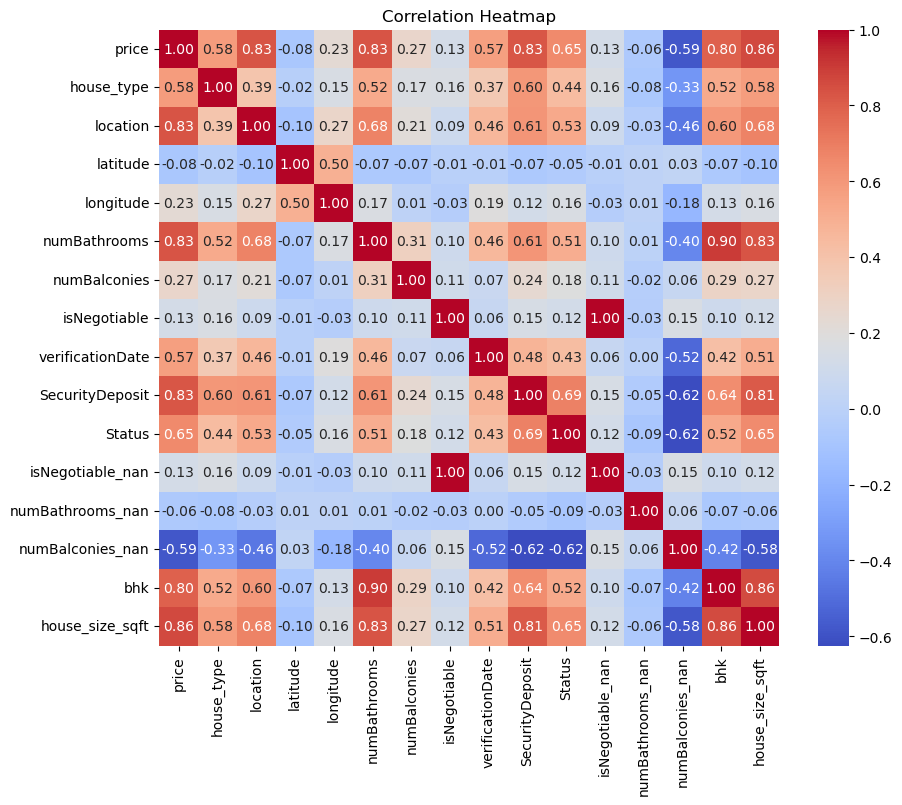

In [150]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [151]:
X = df_scaled.drop('price',axis=1)
y = df_scaled['price']

feature_selection_model = SelectFromModel(Lasso(alpha = 0.05, random_state = 0))
feature_selection_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [152]:
feature_selection_model.get_support()

array([ True,  True, False, False,  True, False, False,  True,  True,
       False, False, False,  True,  True,  True])

In [153]:
Selected_Features = X.columns[(feature_selection_model.get_support())]
Selected_Features

Index(['house_type', 'location', 'numBathrooms', 'verificationDate',
       'SecurityDeposit', 'numBalconies_nan', 'bhk', 'house_size_sqft'],
      dtype='object')

Combining results of both correlation matrix and SelectFromModel the following columns will be dropped and not used for model training : **Latitude, Longitude, numBalconies, isNegotiable, isNegotiable_nan, numBathrooms_nan.**

# 6. Model Training

In [156]:
X_final = df_scaled.drop(['latitude','longitude','numBalconies','isNegotiable','isNegotiable_nan','numBathrooms_nan','price'],axis=1)
y_final = df_scaled['price']

In [157]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4000, 9), (1000, 9), (4000,), (1000,))

In [158]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [159]:
def model_trainer(X_train,X_test,y_train,y_test):
  models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()}
  model_list = []
  r2_list = []

  for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

  return model_list,r2_list

In [160]:
model_list,r2_list = model_trainer(X_train,X_test,y_train,y_test)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3880
- Mean Absolute Error: 0.2932
- R2 Score: 0.9236
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3568
- Mean Absolute Error: 0.2750
- R2 Score: 0.9320


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.2109
- Mean Absolute Error: 1.0886
- R2 Score: 0.2562
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1756
- Mean Absolute Error: 1.0517
- R2 Score: 0.2623


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3880
- Mean Absolute Error: 0.2933
- R2 Score: 0.9236
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3568
- Mean Absolute Error: 0.2750
- R2 Score: 0.9321


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2180
- Mean Absolute Error: 0.1333
- R2 Score: 0.9759
-----------------------

# 7. Choosing Best Model

In [162]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.981968
6,XGBRegressor,0.981935
5,Random Forest Regressor,0.977374
3,K-Neighbors Regressor,0.966412
4,Decision Tree,0.964800
8,AdaBoost Regressor,0.942021
2,Ridge,0.932050
0,Linear Regression,0.932047
1,Lasso,0.262291


In [163]:
cb_model = CatBoostRegressor(verbose=False)
cb_model = cb_model.fit(X_train, y_train)
y_pred = cb_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.20


# 8. Results

Text(0, 0.5, 'Predicted')

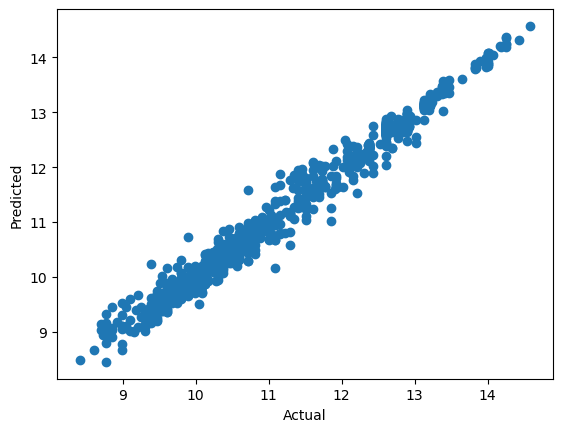

In [165]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted')

<Axes: xlabel='price'>

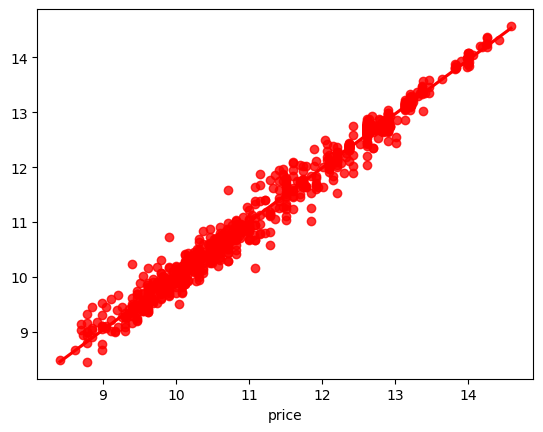

In [166]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [213]:
import pickle

# Save the model and scaler to a pickle file
with open('model_and_scaler.pkl', 'wb') as file:
    pickle.dump({'model': cb_model, 'scaler': scaler}, file)
